In [80]:
import xlrd
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import datetime as dt
import copy
import matplotlib.dates as mdate
import time
ind=0

# 中位数极值法

In [2]:
def medianpeak(x):
    y=np.copy(x)
    ymedian=np.median(y)
    zmid=np.median(np.abs(y-np.median(y)))
    y[y<=ymedian-5.2*zmid]=(ymedian-5.2*zmid)
    y[y>=ymedian+5.2*zmid]=(ymedian+5.2*zmid)
    return 1/y

# 无量纲化处理

In [3]:
def nondimensionalize(x):
    y=np.copy(x)
    ymean=np.mean(y)
    ystd=np.std(y)
    y=(y-ymean)/ystd
    return y

# 请输入时间频率 分组 

In [4]:
frequency=input()
gronum=input()

M
10


# 因子名称

In [5]:
factorname=input()
file='C:\\Users\\wuboyuan\\Desktop\\data\\'+input()+'.csv'

成交量
cjl


# 时间调整函数

In [170]:
def dadjust(data):
    data0=copy.deepcopy(data)
    index1=data0.index.to_period(freq=frequency).values
    fre=np.unique(index1)
    data0.index=index1
    data0.index=data0.index.to_series().astype(str).values
    return data0

In [177]:
data=pd.read_csv(file,parse_dates=True,index_col=0)
data0=dadjust(data)
fre=np.unique(data0.index)

In [178]:
dic={}
group={}
for i in range(len(fre)+1):
        data1=data0.loc[fre[i-1]]
        data1=data1[data1!=0]
        data1=data1[len(data1)-1:len(data1)].T.dropna()
        sdata=data1.apply(medianpeak).sort_values(by=fre[i-1],ascending=False)
        l=len(sdata)
        if i ==0:
            dic[i]=0
        else:
            for j in range(int(gronum)):
                group[j]=sdata[round(((j)/10)*l):round(((j+1)/10)*l)].index
            dic[i]=copy.deepcopy(group)

# 中证500收益率，组合收益率，超额收益，相对收益按周期进行 总周期平均水平

# 每日收益率

In [179]:
errate11=pd.read_csv('C:\\Users\\wuboyuan\\Desktop\\data\\spj.csv',parse_dates=True,index_col=0)
errate1=dadjust(errate11)
indexchina1=pd.read_csv('C:\\Users\\wuboyuan\\Desktop\\data\\000905.csv',parse_dates=True,index_col=0)
indexchina=dadjust(indexchina1)
errate=(errate1-errate1.shift(1))/errate1.shift(1)
errate=errate[1:]
errate500=(indexchina-indexchina.shift(1))/indexchina.shift(1)
errate500=errate500[1:]

# 周期收益率

In [180]:
for i in range(len(fre)):
    if i ==0:
        cdrate=0
        indec500=0
    else:
        u=len(errate1.loc[fre[i-1]])
        m=len(errate1.loc[fre[i]])
        rate0=errate1.loc[fre[i-1]]
        rate0=rate0[u-1:u]
        rate50=indexchina.loc[fre[i-1]][u-1:u]
        rate1=errate1.loc[fre[i]]
        rate1=rate1[m-1:m]
        rate510=indexchina.loc[fre[i]][m-1:m]
        rate=rate0.append(rate1)
        rate500=rate50.append(rate510)
        rate=(rate-rate.shift(1))/rate.shift(1)
        rate500=(rate500-rate500.shift(1))/rate500.shift(1)
        rate=rate[1:]
        rate500=rate500[1:]
        cdrate0=copy.deepcopy(rate)
        rate501=copy.deepcopy(rate500)
        if i==1:
            cdrate=cdrate0
            cdrate500=rate501
        else:
            cdrate=cdrate.append(cdrate0)
            cdrate500=cdrate500.append(rate501)

In [181]:
mrate=np.zeros(len(fre)-1)
dicrate={}
grorate=np.zeros(int(gronum))
grorate500=np.zeros(int(gronum))
for j in range(int(gronum)):
    for i in range(len(fre)-1):
        mrate[i]=cdrate[dic[i+1][j]].loc[fre[i+1]].mean()
    dicrate[j]= copy.deepcopy(mrate)
for key in dicrate:
    grorate[key]=dicrate[key].mean()
    grorate500[key]=dicrate[key].mean()-cdrate500.mean()
grorate0=np.hstack((grorate,cdrate500.mean().values[0]))
num=np.arange(len(grorate0))
num1=np.arange(len(grorate500))
grorate

array([ 0.0170234 ,  0.01384998,  0.01325957,  0.01157308,  0.01404559,
        0.01372585,  0.01610416,  0.01175107,  0.0087621 , -0.00565498])

# 组合 超额IC

In [182]:
ic=np.zeros(len(fre)-1)
ic500=np.zeros(len(fre)-1)
icde=np.zeros(len(fre)-1)
for i in range(len(fre)-1):
    data2=data0.loc[fre[i]]
    data2=data2[len(data2)-1:len(data2)]
    icdata=data2[dic[i+1][0]].values
    icrate=cdrate[dic[i+1][0]].loc[fre[i+1]].values
    icdely=cdrate[dic[1][0]].loc[fre[i+1]].values
    icrate500=cdrate[dic[i+1][0]].loc[fre[i+1]].values-cdrate500.loc[fre[i+1]].values
    datarank0=np.arange(len(icdely)+1)[1:]
    datarank=np.arange(len(icrate)+1)[1:]
    ic[i]=np.corrcoef(datarank,icrate500)[1][0]
    ic500[i]=np.corrcoef(icdata,icrate500)[1][0]
    icde[i]=np.corrcoef(datarank0,icdely)[1][0]

# 胜率 每日 周期

In [184]:
vm=np.zeros(len(fre)-1)
for i in range(len(fre)-1):
    vrate1=copy.deepcopy(errate[dic[i+1][0]].loc[fre[i+1]].T.mean())
    if i==0:
        vrate=copy.deepcopy(vrate1)
    else:
        vrate=vrate.append(vrate1)
victory=vrate[vrate>0].count()/vrate.count()#组合每日胜率

victoryclc=len(dicrate[0][dicrate[0]>0])/len(dicrate[0]) #组合每月胜率

vrate500=vrate.values-errate500.loc[fre[1:]].values.T[0]

victory500=len(vrate500[vrate500>0])/len(vrate500) #每日超额胜率

vclc=dicrate[0]-cdrate500.values.T[0] 

victoryclc500=len(vclc[vclc>0])/len(vclc) #月超额胜率

#每月胜率走势图
"""for i in range(len(fre)-1):
    v=vrate.loc[fre[i+1]]
    vm[i]=v[v>0].count()/v.count()
plt.plot(vm)
plt.show()"""

'for i in range(len(fre)-1):\n    v=vrate.loc[fre[i+1]]\n    vm[i]=v[v>0].count()/v.count()\nplt.plot(vm)\nplt.show()'

# 平均收益率 超额收益率 标准差

In [186]:
vstd=np.zeros(len(fre)-1)
pjrate=dicrate[0].mean() #平均收益率

cerate=pjrate-cdrate500.values.T[0].mean() # 超额平均收益率

ratestd=dicrate[0].std() # 标准差

ceratestd=dicrate[0]-cdrate500.values.T[0]

ceratestd=ceratestd.std() #超额标准差

sharp=cerate/ceratestd #风险溢价

for i in range(len(fre)-1):
    vstd[i]=vrate.loc[fre[i+1]].std()
"""plt.subplot(121) 
plt.plot(vstd)  #每个周期内波动率
plt.subplot(122) 
plt.plot(dicrate[0])  #周期内收益率
plt.show()"""

'plt.subplot(121) \nplt.plot(vstd)  #每个周期内波动率\nplt.subplot(122) \nplt.plot(dicrate[0])  #周期内收益率\nplt.show()'

# 显著性检验

In [187]:
t,p=stats.ttest_1samp(dicrate[0],cdrate500.values.T[0].mean())

# 因子组收益率检验

In [188]:
evalueindex=['平均收益率','标准差','夏普比率','胜率','月胜率']
evaluedata=[pjrate,ratestd,pjrate/ratestd,victory,victoryclc]
result=pd.DataFrame({factorname:evaluedata},index=evalueindex).T

# 因子显著性检验

In [189]:
findex=['超额平均收益率','超额标准差','信息比率','T','P','日胜率','月胜率','IC','IC_IR']
frdata=[cerate,ceratestd,sharp,t,p,victory500,victoryclc500,ic.mean(),ic.mean()/ic.std()]
result1=pd.DataFrame({factorname:frdata},index=findex).T

#  资金走势图

# 资金 费率（买入，卖出）

In [48]:
money=input()
feilvb=input()
feilvs=input()

10000000
0.001
0.001


In [190]:
money=float(money)
feilvb=float(feilvb)
feilvs=float(feilvs)
for i in range(len(fre)-1):
    price=errate1[dic[i+1][0]].loc[fre[i]]
    price=price[len(price)-1:len(price)]
    gromoney=np.floor(int(money)/len(dic[i+1][0]))
    grostock=np.floor(gromoney/(price*100))*(price*100)
    sparem=(money-round(grostock.T.sum().values[0]*float(feilvb),2))-grostock.T.sum().values[0]
    uy=errate.loc[fre[i+1]]+1
    uy=uy[dic[i+1][0]].cumprod().append(grostock)
    uy[0:len(uy)-1]=uy[0:len(uy)-1]*uy.max()
    ret=copy.deepcopy((uy.T.sum()+sparem)[0:len(uy)-1]/money)
    ret[len(ret)-1:len(ret)]=(ret[len(ret)-1:len(ret)]*money-(ret[len(ret)-1:len(ret)]*money-sparem)*feilvs)/money
    uy500=(errate500.loc[fre[i+1]]+1).cumprod()
    #uy500[0:1]=uy500[0:1]-feilvb
    #uy500[len(uy500)-1:len(uy500)]=uy500[len(uy500)-1:len(uy500)]-feilvs
    u500=copy.deepcopy(uy500)
    u=copy.deepcopy(ret)
    if i==0:
        unitnet=copy.deepcopy(u)
        unitnet500=copy.deepcopy(u500)
    else:
        u=u-1+unitnet[len(unitnet)-1:len(unitnet)].values[0]
        u500=u500-1+unitnet500[len(unitnet500)-1:len(unitnet500)].values[0]
        unitnet=unitnet.append(u)
        unitnet500=unitnet500.append(u500)
unitnet.index=data.index[-len(unitnet.index):]
unitnet500.index=data.index[-len(unitnet500.index):]

# 每期因子值

In [191]:
groupdata={}
for i in range(len(fre)-1):
    w=data0[dic[i+1][0]].loc[fre[i+1]]
    w=w[len(w)-1:len(w)]
    value0=copy.deepcopy(w.values[0])
    vindex0=copy.deepcopy(w.T.index)
    if i==0:
        value=copy.deepcopy(value0)
        vindex=copy.deepcopy(vindex0)
        gindex=np.ones(len(value0))
    else:
        value=np.hstack([value,value0])
        vindex=vindex.append(vindex0)
        gindex=np.hstack([gindex,(i+1)*np.ones(len(value0))])
factor_result=pd.DataFrame({factorname:value,'期数':gindex},index=vindex)

# 结果展示

# 每期因子

In [58]:
factor_result

,成交量,期数
今世缘,2227365.0,1.0
木林森,2081346.0,1.0
南京新百,16535673.0,1.0
贵人鸟,2128967.0,1.0
豪迈科技,2733406.0,1.0
莱克电气,1315788.0,1.0
珍宝岛,0.0,1.0
华东电脑,4660823.0,1.0
航天工程,2613713.0,1.0
长春高新,2008289.0,1.0


# 因子单调性检验

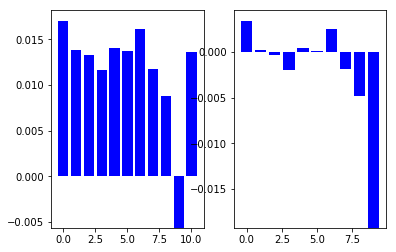

In [192]:
plt.subplot(121)
plt.bar(num,grorate0, color = 'b')
plt.subplot(122)
plt.bar(num1,grorate500, color = 'b')
plt.show()

-0.00086880428355691659

# IC图

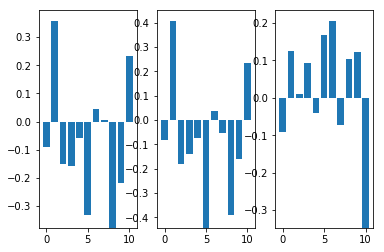

In [193]:
plt.subplot(131)
num2=np.arange(len(ic))
plt.bar(num2,ic) #排序ic
plt.subplot(132)
plt.bar(num2,ic500) #数值IC
plt.subplot(133)
plt.bar(num2,icde) #第一期第一组IC的延续变化
plt.show()

# 因子组收益率检验

In [194]:
result

,平均收益率,标准差,夏普比率,胜率,月胜率
成交量,0.017023,0.06003,0.283583,0.549107,0.454545


# 因子显著性检验

In [195]:
result1

,超额平均收益率,超额标准差,信息比率,T,P,日胜率,月胜率,IC,IC_IR
成交量,0.003427,0.022773,0.150475,0.180521,0.86035,0.553571,0.727273,-0.067662,-0.319441


# 周期收益率图

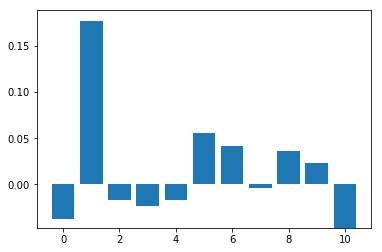

In [196]:
num01=np.arange(len(dicrate[0]))
plt.bar(num01,dicrate[0])
plt.show()

#  单位净值走势图

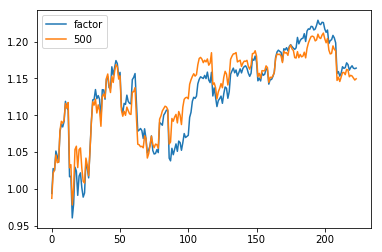

In [197]:
plt.plot(unitnet.values,label='factor')
plt.plot(unitnet500.values,label='500')
plt.legend(loc=0, numpoints=1)
plt.show()

# 超额净值走势图

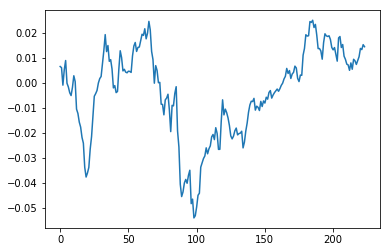

In [198]:
plt.plot(unitnet.values-unitnet500.values.T[0])
plt.show()

In [199]:
if  ind==0:
    result0=copy.deepcopy(result)
else:
    result0=result0.append(result)

In [200]:
if  ind==0:
    result01=copy.deepcopy(result1)
else:
    result01=result01.append(result1)

In [201]:
ind=1

In [202]:
result0

,平均收益率,标准差,夏普比率,胜率,月胜率
成交量,0.017023,0.06003,0.283583,0.549107,0.454545


In [203]:
result01

,超额平均收益率,超额标准差,信息比率,T,P,日胜率,月胜率,IC,IC_IR
成交量,0.003427,0.022773,0.150475,0.180521,0.86035,0.553571,0.727273,-0.067662,-0.319441
